# Penerapan Machine Learning dan Data Science pada Pemilu 2024

Author: **fzn0x**

## Load Dataframe

In [157]:
import pandas as pd

df = pd.read_csv("./ppwp_tps.csv", engine='python')
df

,kode,provinsi_kode,kabupaten_kota_kode,kecamatan_kode,kelurahan_desa_kode,tps,suara_paslon_1,suara_paslon_2,suara_paslon_3,chasil_hal_1,...,status_adm,updated_at,created_at,url_page,provinsi_nama,kabupaten_kota_nama,kecamatan_nama,kelurahan_desa_nama,url_api,fetch_count
0,1509092004010,15,1509,150909,1509092004,10,17.0,130.0,26.0,https://sirekap-obj-formc.kpu.go.id/3854/pemil...,...,f,2024-03-16 00:29:13.757,2024-02-14 19:51:21.82,https://pemilu2024.kpu.go.id/pilpres/hitung-su...,JAMBI,TEBO,TENGAH ILIR,RANTAU API,https://sirekap-obj-data.kpu.go.id/pemilu/hhcw...,43
1,3578031006004,35,3578,357803,3578031006,4,37.0,139.0,50.0,https://sirekap-obj-formc.kpu.go.id/34c9/pemil...,...,t,2024-03-16 00:36:36.215,2024-02-14 19:56:43.305,https://pemilu2024.kpu.go.id/pilpres/hitung-su...,JAWA TIMUR,KOTA SURABAYA,RUNGKUT,MEDOKAN AYU,https://sirekap-obj-data.kpu.go.id/pemilu/hhcw...,43
2,6402022004003,64,6402,640202,6402022004,3,26.0,144.0,23.0,https://sirekap-obj-formc.kpu.go.id/a886/pemil...,...,t,2024-03-16 00:52:53.759,2024-02-14 20:10:09.624,https://pemilu2024.kpu.go.id/pilpres/hitung-su...,KALIMANTAN TIMUR,KUTAI KARTANEGARA,LOA KULU,LOA KULU KOTA,https://sirekap-obj-data.kpu.go.id/pemilu/hhcw...,43
3,3573011001005,35,3573,357301,3573011001,5,NaN,NaN,NaN,NaN,...,f,2024-03-16 00:40:09.05,2024-02-14 19:59:42.811,https://pemilu2024.kpu.go.id/pilpres/hitung-su...,JAWA TIMUR,KOTA MALANG,BLIMBING,BALEARJOSARI,https://sirekap-obj-data.kpu.go.id/pemilu/hhcw...,43
4,3206072003001,32,3206,320607,3206072003,1,86.0,131.0,14.0,https://sirekap-obj-formc.kpu.go.id/4b59/pemil...,...,t,2024-03-16 00:40:17.954,2024-02-14 19:59:53.048,https://pemilu2024.kpu.go.id/pilpres/hitung-su...,JAWA BARAT,TASIKMALAYA,PARUNGPONTENG,CIBANTENG,https://sirekap-obj-data.kpu.go.id/pemilu/hhcw...,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823231,3213052003026,32,3213,321305,3213052003,26,NaN,NaN,NaN,NaN,...,f,2024-03-16 00:22:19.891,2024-02-14 19:45:31.276,https://pemilu2024.kpu.go.id/pilpres/hitung-su...,JAWA BARAT,SUBANG,PABUARAN,PRINGKASAP,https://sirekap-obj-data.kpu.go.id/pemilu/hhcw...,42
823232,6504012003002,65,6504,650401,6504012003,2,19.0,118.0,55.0,https://sirekap-obj-formc.kpu.go.id/bbfb/pemil...,...,t,2024-03-16 00:52:53.454,2024-02-14 20:10:09.871,https://pemilu2024.kpu.go.id/pilpres/hitung-su...,KALIMANTAN UTARA,TANA TIDUNG,SESAYAP,SEBIDAI,https://sirekap-obj-data.kpu.go.id/pemilu/hhcw...,43
823233,1117042012002,11,1117,111704,1117042012,2,120.0,64.0,9.0,https://sirekap-obj-formc.kpu.go.id/b425/pemil...,...,t,2024-03-16 00:58:57.908,2024-02-14 20:15:13.527,https://pemilu2024.kpu.go.id/pilpres/hitung-su...,ACEH,BENER MERIAH,BANDAR,KERAMAT JAYA,https://sirekap-obj-data.kpu.go.id/pemilu/hhcw...,43
823234,1802082012006,18,1802,180208,1802082012,6,1.0,106.0,24.0,https://sirekap-obj-formc.kpu.go.id/2b30/pemil...,...,t,2024-03-16 00:55:14.603,2024-02-14 20:12:11.897,https://pemilu2024.kpu.go.id/pilpres/hitung-su...,LAMPUNG,LAMPUNG TENGAH,SEPUTIH RAMAN,RAMA MURTI,https://sirekap-obj-data.kpu.go.id/pemilu/hhcw...,43


## Data preparation

- Data separation as X and Y

In [158]:
x = df[['suara_paslon_1', 'suara_paslon_2', 'suara_paslon_3']]
y = x.sum(axis=1)

## Data splitting

In [159]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
x_train

,suara_paslon_1,suara_paslon_2,suara_paslon_3
34646,20.0,116.0,28.0
731534,NaN,NaN,NaN
699133,2.0,121.0,46.0
622755,NaN,NaN,NaN
53354,10.0,117.0,69.0
...,...,...,...
212912,NaN,NaN,NaN
65615,35.0,123.0,15.0
778087,121.0,78.0,8.0
210755,82.0,100.0,6.0


In [160]:
x_test

,suara_paslon_1,suara_paslon_2,suara_paslon_3
767447,NaN,NaN,NaN
543982,37.0,121.0,32.0
306721,NaN,NaN,NaN
319537,78.0,89.0,16.0
210058,61.0,101.0,28.0
...,...,...,...
348836,NaN,NaN,NaN
805189,30.0,163.0,28.0
809531,0.0,34.0,19.0
641801,113.0,82.0,6.0


## Model Building

### Hist Gradient Boosting Regressor

#### Training the model

In [161]:
from sklearn.ensemble import HistGradientBoostingRegressor

hgbr = HistGradientBoostingRegressor()
hgbr.fit(x_train, y_train)

HistGradientBoostingRegressor()

#### Applying the model to make a prediction

In [162]:
hgbr_y_train_pred = hgbr.predict(x_train)
hgbr_y_test_pred = hgbr.predict(x_test)

hgbr_y_train_pred

array([1.64409053e+02, 1.89215439e-02, 1.66130754e+02, ...,
       2.05989256e+02, 1.88165025e+02, 1.89215439e-02])

In [163]:
hgbr_y_test_pred

array([1.89215439e-02, 1.91082080e+02, 1.89215439e-02, ...,
       5.72380539e+01, 2.01450192e+02, 1.99680096e+02])

#### Evaluate model performance

In [164]:
from sklearn.metrics import mean_squared_error, r2_score

hgbr_train_mse = mean_squared_error(y_train, hgbr_y_train_pred)
hgbr_train_r2 = r2_score(y_train, hgbr_y_train_pred)

hgbr_test_mse = mean_squared_error(y_test, hgbr_y_test_pred)
hgbr_test_r2 = r2_score(y_test, hgbr_y_test_pred)


In [165]:
print('HGBR MSE (Train): ', hgbr_train_mse)
print('HGBR R2 (Train): ', hgbr_train_r2)
print('HGBR MSE (Test): ', hgbr_test_mse)
print('HGBR R2 (Test): ', hgbr_test_r2)

HGBR MSE (Train):  40.093519574313824
HGBR R2 (Train):  0.9950011488581814
HGBR MSE (Test):  81.57818684324478
HGBR R2 (Test):  0.9896339048991853


In [166]:
hgbr_results = pd.DataFrame(['Hist Gradient Boosting Regressor', hgbr_train_mse, hgbr_train_r2, hgbr_test_mse, hgbr_test_r2]).transpose()
hgbr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

Method: This column specifies the method or algorithm used for training the regression model. In this case, the method used is "Hist Gradient Boosting Regressor," which is a gradient boosting algorithm implemented in scikit-learn.

Training MSE (Mean Squared Error): MSE is a measure of the average squared differences between the actual and predicted values in the training dataset. A lower MSE indicates better performance, as it means the model's predictions are closer to the actual values. In this case, the training MSE is approximately 37.42, suggesting that, on average, the squared differences between the predicted and actual values in the training dataset are relatively low.

Training R2 (R-squared): R-squared is a statistical measure that represents the proportion of the variance in the dependent variable (target) that is explained by the independent variables (features) in the model. It ranges from 0 to 1, where 1 indicates a perfect fit. In this case, the training R2 is approximately 0.995, suggesting that the model explains around 99.5% of the variance in the training data, indicating a very good fit.

Test MSE (Mean Squared Error): Similar to training MSE, test MSE measures the average squared differences between the actual and predicted values in the testing dataset. It serves as a measure of the model's performance on unseen data. In this case, the test MSE is approximately 74.42, indicating that, on average, the squared differences between the predicted and actual values in the testing dataset are relatively low but slightly higher than the training MSE.

Test R2 (R-squared): Test R2 represents the proportion of the variance in the dependent variable that is explained by the independent variables in the model, evaluated on the testing dataset. A higher R2 value indicates better predictive performance. In this case, the test R2 is approximately 0.991, indicating that the model explains around 99.1% of the variance in the testing data, suggesting a very good predictive performance on unseen data, although slightly lower than the training R2.

In [167]:
hgbr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Hist Gradient Boosting Regressor,40.09352,0.995001,81.578187,0.989634


### Random Forest

#### Training the model

In [168]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Assuming x_train and y_train are your training data with NaN values in x_train
# Instantiate the imputer to handle missing values
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if desired

# Fit the imputer to x_train and transform x_train
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.fit_transform(x_test)

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train_imputed, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [169]:
rf_y_train_pred = rf.predict(x_train_imputed)
rf_y_test_pred = rf.predict(x_test_imputed)

rf_y_train_pred

array([1.80355367e+02, 3.90892548e-04, 2.15690147e+02, ...,
       1.80355367e+02, 1.80355367e+02, 3.90892548e-04])

In [170]:
rf_y_test_pred

array([3.90892548e-04, 2.15690147e+02, 3.90892548e-04, ...,
       1.80355367e+02, 1.80355367e+02, 2.15690147e+02])

#### Evaluate Model Performance

In [171]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, rf_y_train_pred)
rf_train_r2 = r2_score(y_train, rf_y_train_pred)

rf_test_mse = mean_squared_error(y_test, rf_y_test_pred)
rf_test_r2 = r2_score(y_test, rf_y_test_pred)

In [172]:
rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [173]:
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,1029.316253,0.871665,1017.676398,0.870684


### Model comparison

In [174]:
df_models = pd.concat([hgbr_results, rf_results], axis=0)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Hist Gradient Boosting Regressor,40.09352,0.995001,81.578187,0.989634
0,Random forest,1029.316253,0.871665,1017.676398,0.870684


# Data Visualization

Text(0.5, 0, 'Experimental Votes')

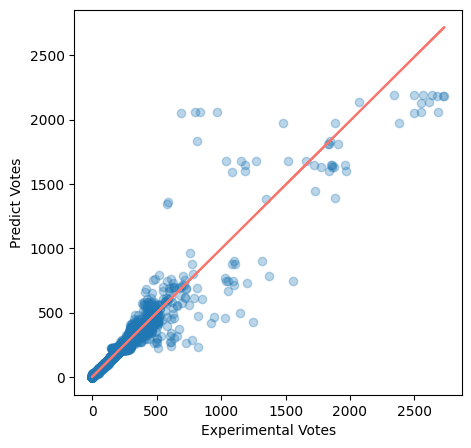

In [175]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=hgbr_y_train_pred, alpha=0.3)

z = np.polyfit(y_train, hgbr_y_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict Votes')
plt.xlabel('Experimental Votes')